# Dataset 1
## Importing the data

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import statistics as st
from sklearn import neighbors
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Adult dataset
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
       'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

#convert 
missing_values = [' ?', '?']
data_df = pd.read_csv('C:/Jiayang/JupyterLab/Comp_551/mini_project_1/adult.data',header=None,na_values = missing_values,names = header)
test_df = pd.read_csv('C:/Jiayang/JupyterLab/Comp_551/mini_project_1/adult.test',header = None,na_values = missing_values,names = header)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#number of rows x number of columns
print('shape:',data_df.shape)
data_df.head()

shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# # Check all entries if there are invalid data
# for col in data_df.columns:
#   if data_df[col].dtype == "object":
#     print('Attribute name:',col)
#     print(data_df[col].value_counts())
#     print('\n')

# Data Cleaning

In [6]:
# Create a copy of the dataframe(checkpoint_1) before dropna
df = data_df.copy(deep = True)

In [7]:
# drop invalid data rows
# ? is already converted to Nan while reading_csv
df = df.dropna()
print(df.shape)

(30162, 15)


In [8]:
#check all is dropped
null_data = df.iloc[:,:-1]
null_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

# Visualization

(Might need to do for other types too)

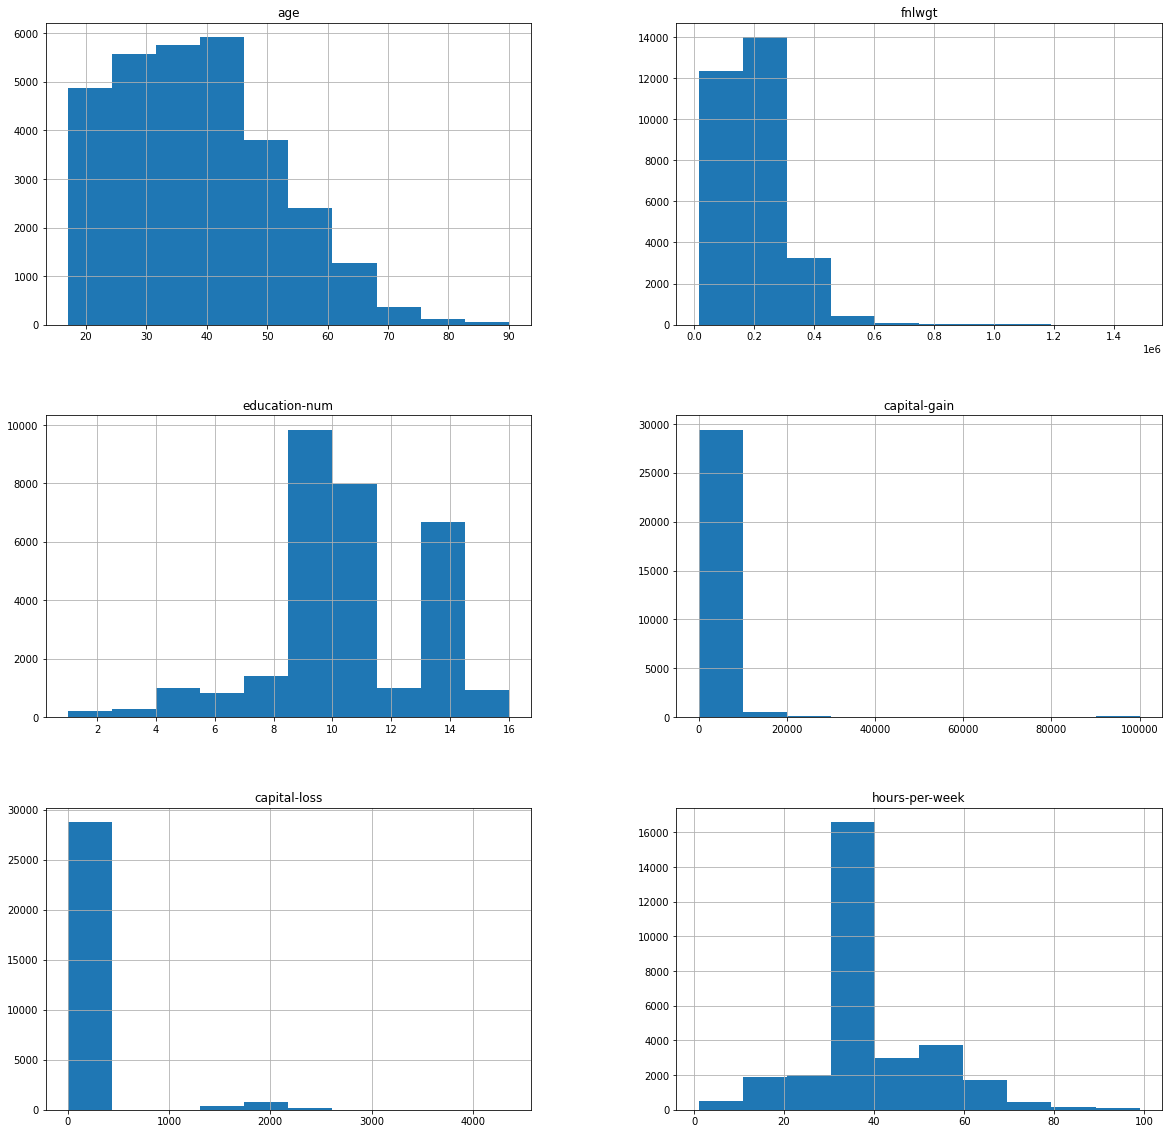

In [9]:
# a histogram display the adult data with 
# y-axis = number of people and
# x-axis = value of feature

p = df.hist(figsize = (20,20))

In [10]:
#...

# Encoding

In [11]:
# Create copies of dataset(checkpoint_2) before conveting 
df_copy = df.copy(deep = True)

In [13]:
# Converting 'sex' and 'salary' to binary

print('sex:\n',df_copy["sex"].value_counts())
print('salary:\n',df_copy["salary"].value_counts())

# Male = 1, Female = 0
df_copy["sex"] = np.where(df.sex == ' Male', 1, 0)
# Salary > 50K = 1, < 50K = 0
df_copy["salary"] = np.where(df.salary == ' >50K', 1 , 0)

sex:
  Male      20380
 Female     9782
Name: sex, dtype: int64
salary:
  <=50K    22654
 >50K      7508
Name: salary, dtype: int64


In [14]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [ ]:
# Since in the previous check, the adult dataset only contains object and int types
# Here we divided our features into two types: categorical features and quantitative features

In [15]:
# Check int data type
int_col= []
for col in df_copy.columns:
    if df_copy[col].dtype == 'int64' or df_copy[col].dtype == 'int32':
        int_col.append(col)
print(int_col)

['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


In [16]:
# Check object data type
obj_col= []
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        obj_col.append(col)
print(obj_col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


### categorical features

#### one hot encoding

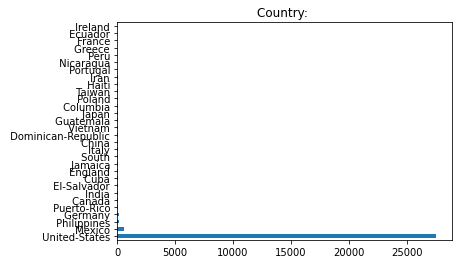

In [17]:
%matplotlib inline

plt.title('Country: ')
(df_copy['native-country']
     .value_counts()
      .head(30)
     .plot(kind='barh'))

plt.show()

In [ ]:
# here we can see doing one hot encoding is not a really good idea since most of our data sample are from states

In [26]:
# quantitative_subset = df_copy.select_dtypes('number')
categorical_subset = df_copy.select_dtypes('object')

#hence we drop country col 
categorical_subset_ohe = categorical_subset.drop('native-country',1)

In [27]:
categorical_subset_ohe.head()

,workclass,education,marital-status,occupation,relationship,race
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black


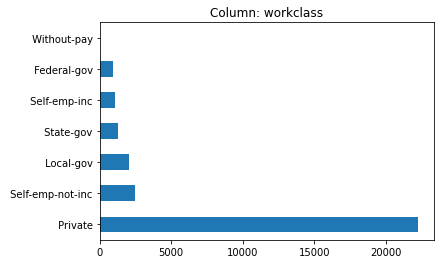

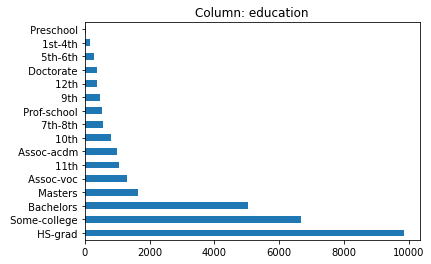

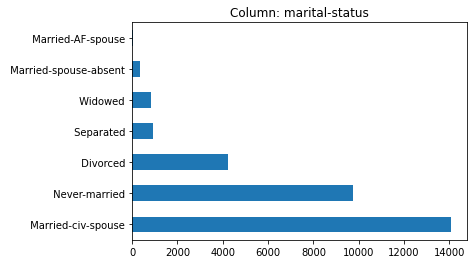

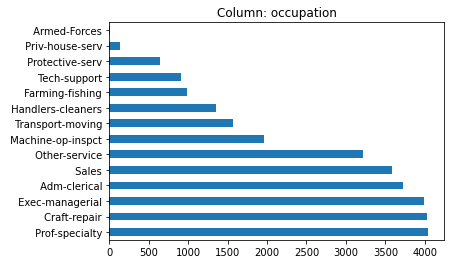

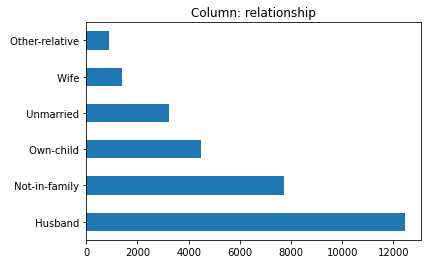

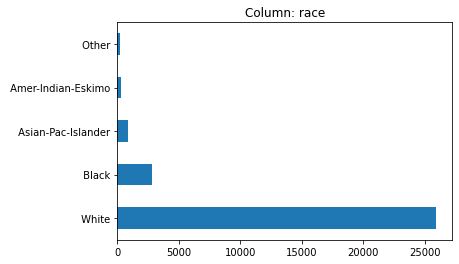

In [28]:
for idx, colname in enumerate(categorical_subset_ohe):
    
    plt.title('Column: ' + colname)
    (df_copy[colname]
        .value_counts()
        .head(30)
        .plot(kind='barh'))

    plt.show()

In [29]:
# check and we are good 
categorical_subset_ohe = pd.get_dummies(categorical_subset_ohe[categorical_subset_ohe.columns])
categorical_subset_ohe.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Ordinal Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

categorical_subset_ord = categorical_subset.copy(True)

for col in categorical_subset_ord.columns[:]:
    if categorical_subset_ord[col].dtype == "object":
        categorical_subset_ord[col] = ord_enc.fit_transform(categorical_subset_ord[[col]])
        
categorical_subset_ord.head()

,workclass,education,marital-status,occupation,relationship,race,native-country
0,5.0,9.0,4.0,0.0,1.0,4.0,38.0
1,4.0,9.0,2.0,3.0,0.0,4.0,38.0
2,2.0,11.0,0.0,5.0,1.0,4.0,38.0
3,2.0,1.0,2.0,5.0,0.0,2.0,38.0
4,2.0,9.0,2.0,9.0,5.0,2.0,4.0


### Quantitive Features

#### StandardScalar

In [46]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
df_int_std = pd.DataFrame(std_scaler.fit_transform(df_copy[int_col]), columns=int_col)
df_int_std.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,0.042796,-1.062722,1.128918,0.692806,0.146092,-0.218586,-0.077734,-0.575691
1,0.880288,-1.007871,1.128918,0.692806,-0.147445,-0.218586,-2.331531,-0.575691
2,-0.033340,0.244693,-0.439738,0.692806,-0.147445,-0.218586,-0.077734,-0.575691
3,1.108695,0.425240,-1.224066,0.692806,-0.147445,-0.218586,-0.077734,-0.575691
4,-0.794697,1.406658,1.128918,-1.443405,-0.147445,-0.218586,-0.077734,-0.575691


#### Min_max

In [44]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_int_nrm = pd.DataFrame(min_max_scaler.fit_transform(df_copy[int_col]), columns=int_col)
df_int_nrm.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,0.301370,0.043338,0.800000,1.0,0.02174,0.0,0.397959,0.0
1,0.452055,0.047277,0.800000,1.0,0.00000,0.0,0.122449,0.0
2,0.287671,0.137244,0.533333,1.0,0.00000,0.0,0.397959,0.0
3,0.493151,0.150212,0.400000,1.0,0.00000,0.0,0.397959,0.0
4,0.150685,0.220703,0.800000,0.0,0.00000,0.0,0.397959,0.0


In [50]:
# Insert id column to different datasets
df_int_std.insert(0, 'id', range(0, 0 + len(df_int_std)))
df_int_nrm.insert(0, 'id', range(0, 0 + len(df_int_nrm)))
categorical_subset_ohe.insert(0, 'id', range(0, 0 + len(categorical_subset_ohe)))
categorical_subset_ord.insert(0, 'id', range(0, 0 + len(categorical_subset_ord)))


In [96]:
df_int_std.shape

(30162, 9)

In [97]:
categorical_subset_ohe.shape

(30162, 56)

In [ ]:
#Choose conbinations

In [98]:
# Merge datasets
df_feature = pd.merge(df_int_std,categorical_subset_ohe, on=["id"])

# Show the the tope 5 obersrvation of the dataset
df_feature.head(5)

,id,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0.042796,-1.062722,1.128918,0.692806,0.146092,-0.218586,-0.077734,-0.575691,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0.880288,-1.007871,1.128918,0.692806,-0.147445,-0.218586,-2.331531,-0.575691,0,...,0,0,0,0,0,0,0,0,0,1
2,2,-0.033340,0.244693,-0.439738,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,...,1,0,0,0,0,0,0,0,0,1
3,3,1.108695,0.425240,-1.224066,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,...,0,0,0,0,0,0,0,1,0,0
4,4,-0.794697,1.406658,1.128918,-1.443405,-0.147445,-0.218586,-0.077734,-0.575691,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
#drop id column
df_feature.drop('id',axis='columns', inplace=True)

In [33]:
df_feature.head(5)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042796,-1.062722,1.128918,0.692806,0.146092,-0.218586,-0.077734,-0.575691,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880288,-1.007871,1.128918,0.692806,-0.147445,-0.218586,-2.331531,-0.575691,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033340,0.244693,-0.439738,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1.108695,0.425240,-1.224066,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.794697,1.406658,1.128918,-1.443405,-0.147445,-0.218586,-0.077734,-0.575691,0,0,...,0,0,0,0,1,0,0,1,0,0


In [34]:
#Convert to numpy
data = df_feature.to_numpy()
data.dtype

dtype('float64')

# KNN K-fold Cross Validation

In [35]:
def split(dataset, folds):
    return np.array_split(dataset, folds)

In [36]:
def KNN_cross_validation(dataset, folds, K):
    
    best_acc = 0
    best_config = 0
    best_model = neighbors.KNeighborsClassifier(n_neighbors=1)
    
    for k in np.arange(1,K):

        model = neighbors.KNeighborsClassifier(n_neighbors=k)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)

            # model.fit(training[:,:14], training[:,14])
            # pred = model.predict(validation[:,:14])
            # acc = np.sum(pred == validation[:,14])/len(validation[:,14])
            # acc_l += acc

            model.fit(training[:,:-1],training[:,-1])
            pred = model.predict(validation[:,:-1])
            acc = np.mean(pred == validation[:,-1])
            acc_l.append(acc)

        acc_m = st.mean(acc_l)
        
        if best_acc < acc_m:
            best_acc = acc_m
            best_config = k
            best_model = model

    return  best_acc, best_config, best_model

# Decision Tree K-fold Cross Validation

In [37]:
from sklearn.tree import DecisionTreeClassifier

def DT_cross_validation(dataset, folds, depth):
    
    best_acc = 0
    best_config = 0
    best_model = DecisionTreeClassifier(max_depth=1)

    for d in np.arange(1,depth):

        model = DecisionTreeClassifier(max_depth=d)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)
        
            model.fit(training[:,:-1],training[:,-1])
            pred = model.predict(validation[:,:-1])
            acc = np.mean(pred == validation[:,-1])
            acc_l.append(acc)

        acc_m = st.mean(acc_l)

        if best_acc < acc_m:
                best_acc = acc_m
                best_config = d
                best_model = model
    
    return  best_acc, best_config, best_model


# Trainning - Dataset 1

In [38]:
size = data.shape[0]

size20 = int(size * 0.2)

size40 = int(size * 0.4)

size60 = int(size * 0.6)

size80 = int(size * 0.8)

In [39]:
%%time

acc1, config1, KNN_model1 = KNN_cross_validation(data[:size20], 5, 20)
print(acc1, config1, KNN_model1)

0.8988391376451078 8 KNeighborsClassifier(n_neighbors=8)
Wall time: 16.2 s


In [40]:
pred = KNN_model1.predict(data[size20:,:-1])
acc = np.mean(pred == data[size20:,-1])
print(acc)

0.8914214670534604


In [ ]:
acc2, config2, KNN_model2 = KNN_cross_validation(data[:size40], 5, 20)
print(acc2, config2, KNN_model2)

In [ ]:
pred = KNN_model2.predict(data[size40:,:14])
acc = np.mean(pred == data[size40:,14])
print(acc)

In [ ]:
acc3, config3, KNN_model3 = KNN_cross_validation(data[:size60], 5, 20)
print(acc3, config3, KNN_model3)

In [ ]:
pred = KNN_model3.predict(data[size60:,:14])
acc = np.mean(pred == data[size60:,14])
print(acc)

In [146]:
%%time
acc4, config4, KNN_model4 = KNN_cross_validation(data[:size80], 5, 20)
print(acc4, config4, KNN_model4)

0.9991710875331565 2 KNeighborsClassifier(n_neighbors=2)
Wall time: 7min 26s


In [147]:
pred = KNN_model4.predict(data[size80:,:-1])
acc = np.mean(pred == data[size80:,-1])
print(acc)

ValueError: Found array with 0 sample(s) (shape=(0, 103)) while a minimum of 1 is required.

In [66]:
dtacc1, dtconfig1, dtmodel1 = DT_cross_validation(data[:size20], 5, 15)
print(dtacc1, dtconfig1, dtmodel1)

0.9991708126036484 1 DecisionTreeClassifier(max_depth=1)


In [ ]:
pred = dtmodel1.predict(data[size20:,:14])
acc = np.mean(pred == data[size20:,14])
print(acc)

In [ ]:
dtacc2, dtconfig2, dtmodel2 = DT_cross_validation(data[:size40], 5, 15)
print(dtacc2, dtconfig2, dtmodel2)

In [ ]:
pred = dtmodel2.predict(data[size40:,:14])
acc = np.mean(pred == data[size40:,14])
print(acc)

In [ ]:
dtacc3, dtconfig3, dtmodel3 = DT_cross_validation(data[:size60], 5, 15)
print(dtacc3, dtconfig3, dtmodel3)

In [ ]:
pred = dtmodel3.predict(data[size60:,:14])
acc = np.mean(pred == data[size60:,14])
print(acc)

In [ ]:
dtacc4, dtconfig4, dtmodel4 = DT_cross_validation(data[:size80], 5, 15)
print(dtacc4, dtconfig4, dtmodel4)

In [ ]:
pred = dtmodel4.predict(data[size80:,:14])
acc = np.mean(pred == data[size80:,14])
print(acc)

# Trainning - Dataset 2

In [62]:
# Load data
df_2 = pd.read_csv('C:/Jiayang/JupyterLab/Comp_551/mini_project_1/bank-additional-full.csv', sep = ";",na_values='unknown')

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [75]:
df_2 = df_2.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [76]:
null_data_2 = df_2.iloc[:,:-1]
null_data_2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [77]:
df_copy_2 = df_2.copy(deep = True)

In [78]:
# Categorical features
categs= []
for col in df_copy_2.columns:
    if df_copy_2[col].dtype == 'object':
        categs.append(col)
print(categs)

# Quantitative features
quantit = [i for i in var_names if i not in categs]
print(quantit)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [79]:
categs_df = df_copy_2.select_dtypes('object')
categs_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no


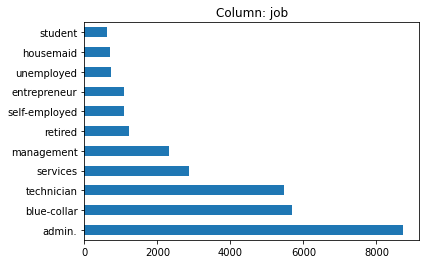

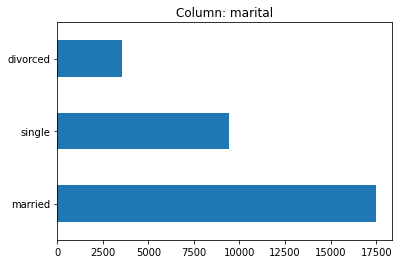

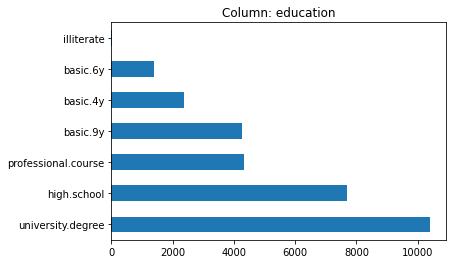

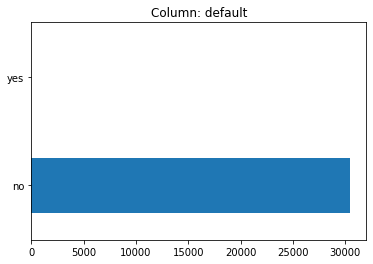

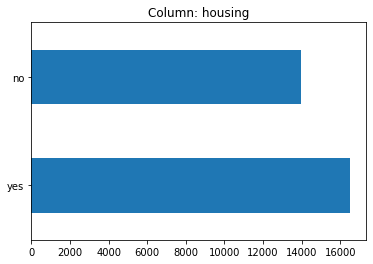

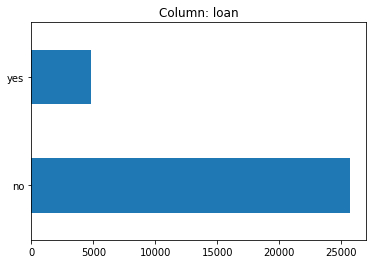

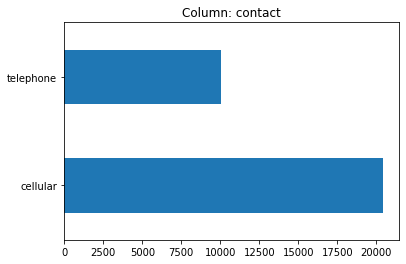

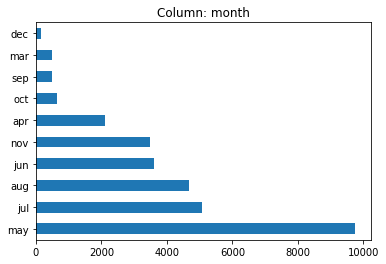

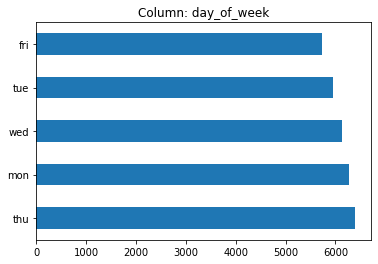

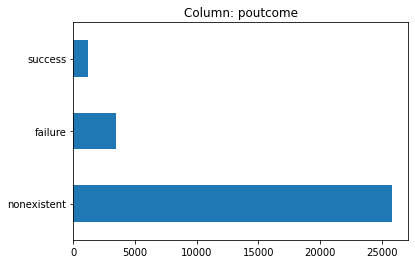

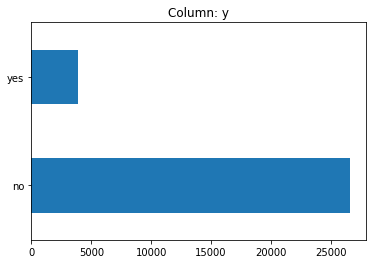

In [80]:
for idx, colname in enumerate(categs_df):
    plt.title('Column: ' + colname)
    (categs_df[colname]
        .value_counts()
        .head(30)
        .plot(kind='barh'))

    plt.show()

In [81]:
categs_df_ohe = pd.get_dummies(categorical_subset_ohe[categorical_subset_ohe.columns])
categs_df_ohe.head()

,id,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [82]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

categs_df_ord = categs_df.copy(True)

for col in categs_df_ord.columns[:]:
    if categs_df_ord[col].dtype == "object":
        categs_df_ord[col] = ord_enc.fit_transform(categs_df_ord[[col]])
        
categs_df_ord.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
2,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
4,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,1.0,1.0,0.0
6,0.0,1.0,5.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0


In [87]:
quantit_df = df_copy_2[quantit]

In [88]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
quantit_df_std = pd.DataFrame(std_scaler.fit_transform(quantit_df), columns=quantit)
quantit_df_std.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.642253,0.005792,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648
1,-0.196452,-0.127944,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648
2,0.093870,-0.414520,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648
3,1.642253,0.181559,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648
4,1.932575,-0.460373,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648


In [90]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

quantit_df_nrm = pd.DataFrame(min_max_scaler.fit_transform(quantit_df), columns=quantit)
quantit_df_nrm.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.500000,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.256410,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.294872,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.500000,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.538462,0.028264,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [93]:
#choose conbination
# Get final df
final_df_2 = pd.concat([categs_df_ohe,quantit_df_nrm], axis=1)

# Quick check
final_df_2.head()

,id,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.500000,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.256410,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.294872,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.500000,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.538462,0.028264,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [125]:
final_df_2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [131]:
%%time

acc1, config1, KNN_model1 = KNN_cross_validation(data2_try[:size20], 5, 20)
print(acc1, config1, KNN_model1)

0.9611414693381907 2 KNeighborsClassifier(n_neighbors=2)
Wall time: 29.7 s


In [133]:
pred = KNN_model1.predict(data2_try[size20:,:-1])
acc = np.mean(pred == data2_try[size20:,-1])
print(acc)

0.868167885648387


In [135]:
size = data2.shape[0]

size20 = int(size * 0.2)

size40 = int(size * 0.4)

size60 = int(size * 0.6)

size80 = int(size * 0.8)

In [136]:
%%time

acc1, config1, KNN_model1 = KNN_cross_validation(data2[:size20], 5, 20)
print(acc1, config1, KNN_model1)

0.9587128111718276 2 KNeighborsClassifier(n_neighbors=2)
Wall time: 27.9 s


In [137]:
pred = KNN_model1.predict(data2[size20:,:-1])
acc = np.mean(pred == data2[size20:,-1])
print(acc)

0.8673484871475827


AttributeError: 'numpy.ndarray' object has no attribute 'to_dataframe'